# 📊 Dataset Information

**Note:** The dataset for this project is **may not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download the Bi_Intro Dataset](https://www.kaggle.com/datasets/walekhwatlphilip/intro-to-data-cleaning-eda-and-machine-learning)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.


# Importing

## Import Libraray

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('bi.csv', encoding='latin1')

# PreProcessing

## Details of Dataset

### Frist five row

In [3]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,24,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


### last Five row

In [4]:
df.tail()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74
76,Mohammed,Salim,31,Male,Somali,Sognsvann,35,Masters,144,72.0,90


### Shape of our dataset

In [5]:
df.shape

(77, 11)

### List out all columns

In [6]:
df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

### Datatype of each columns

In [7]:
df.dtypes

fNAME             object
lNAME             object
Age                int64
gender            object
country           object
residence         object
entryEXAM          int64
prevEducation     object
studyHOURS         int64
Python           float64
DB                 int64
dtype: object

### Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


### Check Null Value

In [9]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

### Handle Null value, Replace with Mean

In [10]:
df['Python'] = df['Python'].fillna(df['Python'].mean())
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

### Check Duplicate Value

In [11]:
df.duplicated().sum()

np.int64(0)

### summary of the dataset

In [12]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.233766,76.753247,149.714286,75.853333,69.467532
std,10.310822,16.475784,12.743272,15.206208,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


## Data Cleaning

### Clean Column Names

In [13]:
df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

In [14]:
import re

def clean_column(name):
    words = re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?![a-z])', name)
    return ''.join([w.capitalize() for w in words])

df.columns = [clean_column(col) for col in df.columns]

df.columns

Index(['FName', 'LName', 'Age', 'Gender', 'Country', 'Residence', 'EntryExam',
       'PrevEducation', 'StudyHours', 'Python', 'Db'],
      dtype='object')

### Standardize Country Names

In [15]:
df['Country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [16]:
country_mapping  = {
    'Rsa': 'Russia',
    'Norge': 'Norway',
    'norway': 'Norway',
    'UK': 'United Kingdom',
    'Somali': 'Somalia'
}

df["Country"] = df["Country"].replace(country_mapping)
df['Country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Russia', 'South Africa', 'Denmark',
       'Netherlands', 'Italy', 'Spain', 'United Kingdom', 'Somalia',
       'Nigeria', 'Germany', 'France'], dtype=object)

### Standardize Education Leavl

In [17]:
df['PrevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [18]:
education_mapping = {
    'HighSchool': 'High School',
    'High School': 'High School',
    'Bachelors': 'Bachelors',
    'Barrrchelors': 'Bachelors',
    'Masters': 'Masters',
    'Diploma': 'Diploma',
    'diploma': 'Diploma',
    'DIPLOMA': 'Diploma',
    'Diplomaaa': 'Diploma',
    'Doctorate': 'Doctorate'
}
df['PrevEducation'] = df['PrevEducation'].replace(education_mapping)
print(df['PrevEducation'].unique())

['Masters' 'Diploma' 'High School' 'Bachelors' 'Doctorate']


### Standardize Gender Values

In [19]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [20]:
gender_mapping = {
    'F': 'Female',
    'Female': 'Female',
    'female': 'Female',
    'M': 'Male',
    'Male': 'Male',
    'male': 'Male'
}

df['Gender'] = df['Gender'].replace(gender_mapping)

df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### Standardize Residence Values

In [21]:
df['Residence'].unique()

array(['Private', 'Sognsvann', 'BI Residence', 'BI-Residence',
       'BIResidence', 'BI_Residence'], dtype=object)

In [22]:
residence_mapping = {
    'Private': 'Private',
    'Sognsvann': 'Sognsvann',
    'BI Residence': 'BI Residence',
    'BI-Residence': 'BI Residence',
    'BIResidence': 'BI Residence',
    'BI_Residence': 'BI Residence'
}
df['Residence'] = df['Residence'].replace(residence_mapping)
print(df['Residence'].unique())

['Private' 'Sognsvann' 'BI Residence']


### Full Name Column

In [23]:
df.insert(0, 'Name', df['FName'] + ' ' + df['LName'])

df = df.drop(columns=['FName', 'LName'])

df['Name']

0     Christina Binger
1        Alex Walekhwa
2           Philip Leo
3      Shoni Hlongwane
4       Maria Kedibone
            ...       
72       Clara Bernard
73      Julian Nielsen
74        Sophie Brown
75          Leon Bauer
76      Mohammed Salim
Name: Name, Length: 77, dtype: object

### Needed Columns formatted to two decimal places

In [24]:
df['EntryExam'] = df['EntryExam'].map('{:.2f}'.format)
df['StudyHours'] = df['StudyHours'].map('{:.2f}'.format)
df['Python'] = df['Python'].map('{:.2f}'.format)
df['Db'] = df['Db'].map('{:.2f}'.format)

# Final Dataset

## First 5 row

In [25]:
df.head()

,Name,Age,Gender,Country,Residence,EntryExam,PrevEducation,StudyHours,Python,Db
0,Christina Binger,44,Female,Norway,Private,72.00,Masters,158.00,59.00,55.00
1,Alex Walekhwa,60,Male,Kenya,Private,79.00,Diploma,150.00,60.00,75.00
2,Philip Leo,25,Male,Uganda,Sognsvann,55.00,High School,130.00,74.00,50.00
3,Shoni Hlongwane,24,Female,Russia,Sognsvann,40.00,High School,120.00,75.85,44.00
4,Maria Kedibone,23,Female,South Africa,Sognsvann,65.00,High School,122.00,91.00,80.00


## Last 5 row

In [26]:
df.tail()

,Name,Age,Gender,Country,Residence,EntryExam,PrevEducation,StudyHours,Python,Db
72,Clara Bernard,43,Female,France,Private,80.00,Bachelors,150.00,75.00,43.00
73,Julian Nielsen,31,Male,Denmark,Sognsvann,90.00,Masters,158.00,84.00,83.00
74,Sophie Brown,33,Female,United Kingdom,Sognsvann,96.00,Masters,158.00,85.00,90.00
75,Leon Bauer,35,Male,Germany,Sognsvann,90.00,Masters,160.00,87.00,74.00
76,Mohammed Salim,31,Male,Somalia,Sognsvann,35.00,Masters,144.00,72.00,90.00


# Outlier

## Find Outlier using Plot

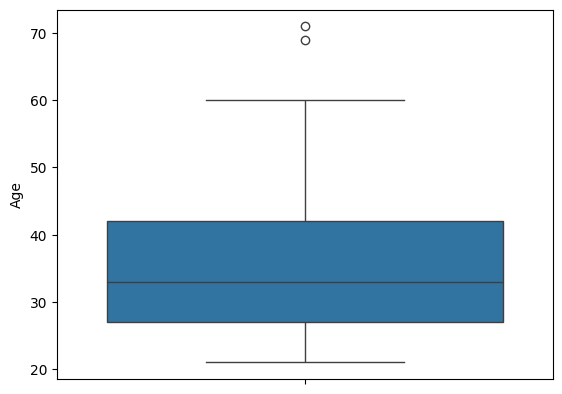

In [27]:
sns.boxplot(y = 'Age', data=df)
plt.show()

## Find Outlier using IQR

In [28]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(15.0)

In [29]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 4.5, Upper Bound: 64.5


### Identify outliers

In [30]:
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

outliers['Age']

32    71
55    69
Name: Age, dtype: int64

### Replace Outlier with Mean

In [31]:
mean_age = df['Age'].mean()
for i in outliers.index:
    df.at[i, 'Age'] = mean_age

# EDA

In [33]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

## Univariate

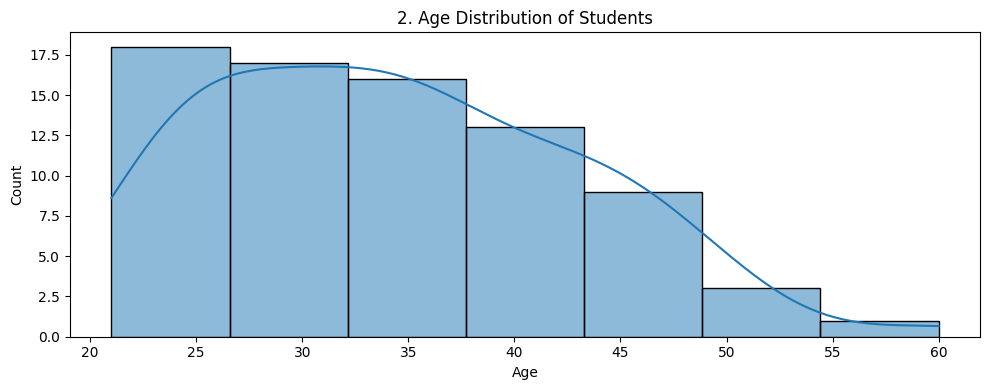

In [48]:
plt.figure(figsize=(10,4))
sns.histplot(df['Age'], bins=7, kde=True)
plt.title(f'{plot_no}. Age Distribution of Students')
show_fig()
plot_no += 1

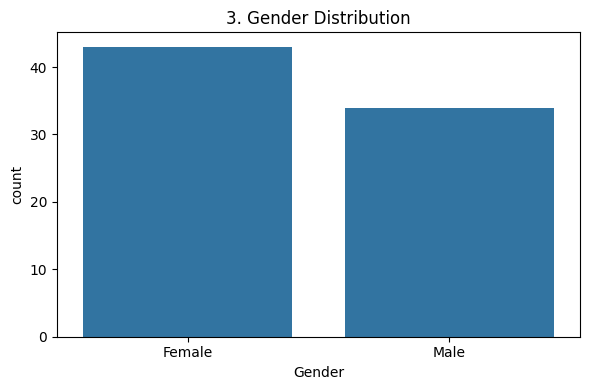

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df)
plt.title(f"{plot_no}. Gender Distribution")
show_fig()
plot_no += 1

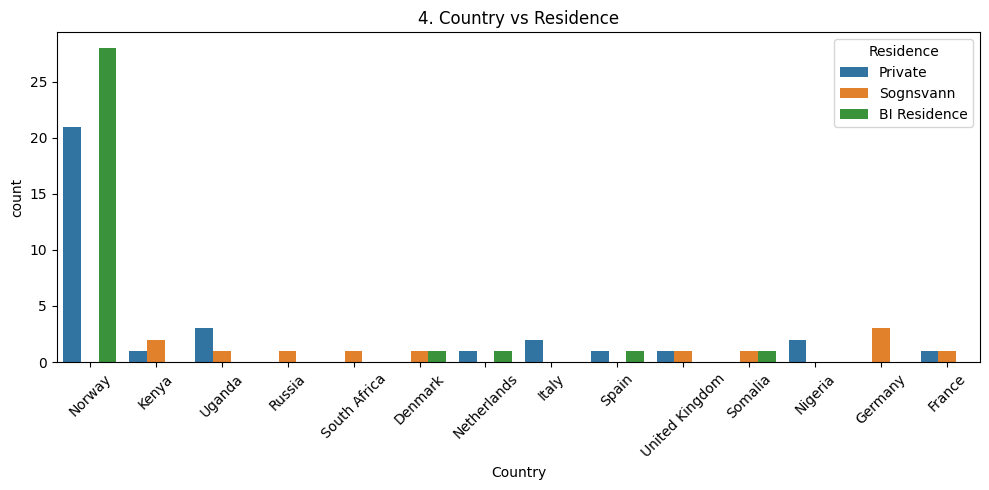

## Bivariate

## Multivariate

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y="prevEducation", data=df, order=df['prevEducation'].value_counts().index)
plt.title("Previous Education Distribution")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['studyHOURS'], bins=20, kde=True, color="darkblue")
plt.title("Study Hours Distribution")
plt.xlabel("Hours per week")
plt.ylabel("Count")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Python", y="DB", hue="gender", data=df, palette="Set1")
plt.title("Python vs Database Skills by Gender")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="gender", y="entryEXAM", data=df)
plt.title("Entry Exam Scores by Gender")
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','entryEXAM','studyHOURS','Python','DB']].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="studyHOURS", y="entryEXAM", hue="prevEducation", data=df)
plt.title("Study Hours vs Entry Exam Score")
plt.show()

In [ ]:
sns.kdeplot(df['Age'], shade=True)
plt.title("KDE of Age")
plt.show()

In [ ]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

In [ ]:
df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Gender Pie Chart")
plt.ylabel("")
plt.show()

In [ ]:
sns.countplot(y='country', data=df, order=df['country'].value_counts().index)
plt.title("Country Distribution")
plt.show()

In [ ]:
sns.countplot(x='prevEducation', data=df)
plt.title("Previous Education Distribution")
plt.show()

In [ ]:
sns.histplot(df['studyHOURS'], bins=10, kde=True)
plt.title("Study Hours Distribution")
plt.show()

In [ ]:
sns.boxplot(x=df['studyHOURS'])
plt.title("Study Hours Boxplot")
plt.show()

In [ ]:
sns.histplot(df['entryEXAM'], kde=True)
plt.title("Entry Exam Distribution")
plt.show()

In [ ]:
sns.histplot(df['Python'], kde=True)
plt.title("Python Score Distribution")
plt.show()

In [ ]:
sns.histplot(df['DB'], kde=True)
plt.title("DB Score Distribution")
plt.show()

In [ ]:
sns.scatterplot(x='Python', y='DB', hue='gender', data=df)
plt.title("Python vs DB by Gender")
plt.show()

In [ ]:
sns.scatterplot(x='studyHOURS', y='Python', hue='prevEducation', data=df)
plt.title("Study Hours vs Python")
plt.show()

In [ ]:
# 15. Study Hours vs DB Scatter
sns.scatterplot(x='studyHOURS', y='DB', hue='gender', data=df)
plt.title("Study Hours vs DB")
plt.show()

In [ ]:
# 16. Entry Exam vs Python Scatter
sns.scatterplot(x='entryEXAM', y='Python', hue='prevEducation', data=df)
plt.title("Entry Exam vs Python")
plt.show()

In [ ]:
sns.scatterplot(x='entryEXAM', y='DB', hue='gender', data=df)
plt.title("Entry Exam vs DB")
plt.show()

In [ ]:
sns.boxplot(x='gender', y='Python', data=df)
plt.title("Python Scores by Gender")
plt.show()

In [ ]:
sns.boxplot(x='gender', y='DB', data=df)
plt.title("DB Scores by Gender")
plt.show()

In [ ]:
sns.boxplot(x='prevEducation', y='Python', data=df)
plt.title("Python Scores by Education")
plt.show()

In [ ]:
sns.boxplot(x='prevEducation', y='DB', data=df)
plt.title("DB Scores by Education")
plt.show()

In [ ]:
sns.barplot(x='country', y='Python', data=df, estimator="mean", errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Python Score by Country")
plt.show()

In [ ]:
sns.barplot(x='country', y='DB', data=df, estimator="mean", errorbar=None)
plt.xticks(rotation=45)
plt.title("Average DB Score by Country")
plt.show()

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
sns.violinplot(x='gender', y='studyHOURS', data=df)
plt.title("Study Hours by Gender")
plt.show()

In [ ]:
sns.stripplot(x='prevEducation', y='studyHOURS', data=df, jitter=True)
plt.title("Study Hours by Education")
plt.show()

In [ ]:
sns.swarmplot(x='gender', y='entryEXAM', data=df)
plt.title("Entry Exam by Gender")
plt.show()

In [ ]:
pd.crosstab(df['prevEducation'], df['gender']).plot(kind="bar", stacked=True)
plt.title("Education vs Gender (Stacked Bar)")
plt.show()

In [ ]:
df['overall'] = (df['Python'] + df['DB']) / 2
sns.histplot(df['overall'], kde=True)
plt.title("Overall Performance Distribution")
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="country", hue="residence", data=df)
plt.title("Country vs Residence")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y="prevEducation", data=df, order=df['prevEducation'].value_counts().index)
plt.title("Previous Education Distribution")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['studyHOURS'], bins=20, kde=True, color="darkblue")
plt.title("Study Hours Distribution")
plt.xlabel("Hours per week")
plt.ylabel("Count")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Python", y="DB", hue="gender", data=df, palette="Set1")
plt.title("Python vs Database Skills by Gender")
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','entryEXAM','studyHOURS','Python','DB']].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="studyHOURS", y="entryEXAM", hue="prevEducation", data=df)
plt.title("Study Hours vs Entry Exam Score")
plt.show()

In [ ]:
sns.histplot(df['studyHOURS'],kde=True)

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','entryEXAM','studyHOURS','Python','DB']].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
sns.scatterplot(x='studyHOURS', y='Python', hue='gender', data=df)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
ax =sns.histplot(data=df, x="Age", hue="gender", multiple="dodge", shrink=.8)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # count value (integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='center', xytext=(0, 8), textcoords='offset points'
    )
plt.title("Student Age Distribution")
plt.xlabel("Age")
plt.ylabel("No of Student")
plt.show(

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(df,x='gender',width = 0.4)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # count value (integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='center', xytext=(0, 8), textcoords='offset points'
    )
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel('Count')

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df,x='country',width = 0.4)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # count value (integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='center', xytext=(0, 8), textcoords='offset points'
    )
plt.title("Country Distribution")
plt.xlabel("Country")
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df,x='residence',width = 0.4)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # count value (integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='center', xytext=(0, 8), textcoords='offset points'
    )
plt.title("Residence Distribution")
plt.xlabel("Residence")
plt.ylabel('Count')

plt.show()

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df,x='prevEducation',width = 0.4)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # count value (integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='center', xytext=(0, 8), textcoords='offset points'
    )
plt.title("Previous Education Distribution")
plt.xlabel("Previous Education")
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="country", hue="residence", multiple="dodge", shrink=.8)
plt.title("Country vs Residence")
plt.xlabel("Age")
plt.ylabel("No of Student")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="studyHOURS",hue="gender")
plt.title('Study Hours for Gender')
plt.xlabel('Study Hours')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="Python",hue="gender")
plt.title('Python for Gender')
plt.xlabel('Python')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x="prevEducation", y="Python")
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),   # count value (integer)
        (p.get_x() + p.get_width() / 2., p.get_height()/2),  # position
        ha='center', va='center', xytext=(0, 15), textcoords='offset points'
    )
plt.title('Python for Previous Education')
plt.xlabel('Python')
plt.ylabel('Count')
plt.show()

In [ ]:
sns.histplot(data=df, x="DB")
plt.title('Histogram Plot for DB')
plt.xlabel('DB')
plt.ylabel('Count')
plt.show()

In [ ]:
avg_hours = df.groupby(['gender','prevEducation'])['studyHOURS'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_hours, 
    x='prevEducation', 
    y='studyHOURS', 
    hue='gender'
)

plt.title("Average Study Hours by Gender & Previous Education", fontsize=14)
plt.ylabel("Average Study Hours")
plt.xlabel("Previous Education")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()

In [ ]:
avg_python = df.groupby(['residence','prevEducation'])['Python'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(
    data = avg_python,
    x = 'prevEducation',
    y = 'Python',
    hue= 'residence'
)
plt.title("Average Python Score by Residence & Previous Education", fontsize=14)
plt.ylabel("Average Python Score")
plt.xlabel("Previous Education")
plt.legend(title="residence")
plt.xticks(rotation=45)
plt.show()

In [ ]:
avg_scores = df.groupby('prevEducation')[['entryEXAM','Python','DB']].mean().reset_index()

plt.figure(figsize=(10,6))
for col in ['entryEXAM','Python','DB']:
    plt.plot(avg_scores['prevEducation'], avg_scores[col], marker='o', label=col)

plt.title("Average Entry Exam, Python, and DB Scores by Previous Education")
plt.xlabel("Previous Education")
plt.ylabel("Average Value")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
categories = ['Age', 'Entry Exam', 'Study Hours', 'Python Score', 'Database Score']
cluster_profile = df.groupby('Cluster')[categories].mean()

# Number of variables
num_vars = len(categories)

# Create angle for each category on radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Initialization of radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each cluster
for cluster in cluster_profile.index:
    values = cluster_profile.loc[cluster].tolist()
    values += values[:1]  # close the circle
    ax.plot(angles, values, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.25)

# Fix axis to categories
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add title and legend
plt.title('Cluster Profiles Comparison')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

In [ ]:
sns.regplot(x='entryEXAM', y='Python', data=df)
plt.title("Entry Exam vs Python Score")
plt.show()

In [ ]:
country_perf = df.groupby('country')['Python'].mean().sort_values(ascending=False)
country_perf.plot(kind='bar', figsize=(8,4))
plt.title("Average Python Score by Country")
plt.ylabel("Mean Score")
plt.show()

In [ ]:
#plotting the graph for Numerical columns

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
for col in num_col:
    sns.kdeplot(df[col],label=col)

plt.legend()
plt.show()

In [ ]:
# Calculates the average Python score per country and plots it as a line chart

grouped_df = df.groupby("country")["Python"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=grouped_df, x="Python", y="country")
plt.title("Mean Of Python Scores by Country")

plt.show()

In [ ]:
# Counts the number of Python users per country and displays it as a bar chart

grouped_data = df.groupby("country")["Python"].count().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(data=grouped_data, x="Python", y="country")
plt.title("Python Users Count by Country")

plt.show()

In [ ]:
# Her Python puanı için ortalama yaşı hesaplar ve çizgi grafiği ile gösterir

grouped_data = df.groupby("Python")["Age"].mean().sort_values(ascending=False).reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.title("Python Scores by Age")

sns.lineplot(data=grouped_data, x="Python", y="Age", color="orange")

plt.show()

In [ ]:
# Calculates average Python scores for each study hour group and plots a line chart

grouped_data = df.groupby("studyHOURS")["Python"].mean().sort_values(ascending=False).reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))

sns.lineplot(data=grouped_data, x="Python", y="studyHOURS", errorbar=None, color="darkblue")
plt.title("Python Scores by Studey Hours")
plt.tight_layout()

plt.show()